In [47]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib import rc
rc('text', usetex=True)
%matplotlib inline

In [97]:
def fourier_first_derivative(u, dx):

    uhat = np.fft.fft(u)
    
    #Initialize wavenumbers k
    
    nyquist_freq = np.pi/dx #Define maximum k as the Nyquist frequency to avoid aliasing
    dk = nyquist_freq/(nx/2) #Define k interval
    k = np.arange(float(nx))
    
    #Order wavenumbers k
    k[:nx/2] = k[:nx/2]*dk 
    k[nx/2:] = k[:nx/2]-nyquist_freq
    
    #Calculate first derivative
    duhat = (1j*k)*uhat
    du = np.real(np.fft.ifft(duhat))
    
    return du

In [96]:
def fourier_second_derivative(u, dx):

    uhat = np.fft.fft(u)
    nyquist_freq = np.pi/dx
    dk = nyquist_freq/(nx/2)
    k = np.arange(float(nx))
    k[:nx/2] = k[:nx/2]*dk
    k[nx/2:] = k[:nx/2]-nyquist_freq
    duhat = (1j*k)**2*uhat
    ddu = np.real(np.fft.ifft(duhat))
    
    return ddu


In [50]:
#Specify Spatial Grid 

xmin = -10
xmax = 10
nx = 256
x = np.linspace(xmin, xmax, nx)
dx = x[1] - x[0]

#Define initial condition and boundary conditions
u_initial = np.exp(-x**2)
u[:, 0] = u_initial
uold = u_initial

v = 1 #wave velocity

#Initialize array for u(x, t_{i})
u = np.zeros((len(u_initial), nt))

#Define temporal grid

stability_constant = 0.2
dt = stability_constant*dx/v
nt = 2400



In [51]:
#Time Marching Scheme

for t in range(nt-1):

    ddu = fourier_second_derivative(u[:, t], dx)
    unew = ddu*dt**2 + 2*u[:, t] - uold
    unew[0] = 0
    unew[-1] = 0

    u[:, t+1] = unew
    uold = u[:, t]


In [ ]:
#Initialize Plot for animation

fig = plt.figure()
ax = plt.axes(xlim=(-12, 12), ylim=(-2, 2))
ax.set_xlabel(r'Position ($x$)')
ax.set_ylabel(r'Displacement ($u(x, t)$)')
plt.title(r'1D Wave Equation: Fixed Boundaries')
line, = ax.plot([], [], lw=2, alpha = 0.8)

In [57]:
#Functions to animate plot through time steps

def init():
    line.set_data([], [])
    return line,

def animate(i):
    
    xmin = -10
    xmax = 10
    nx = 256
    x = np.linspace(xmin, xmax, nx)
    y = u[:, i]
    line.set_data(x, y)
    return line,


        



    
    


/Users/imac/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:7: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/imac/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:8: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


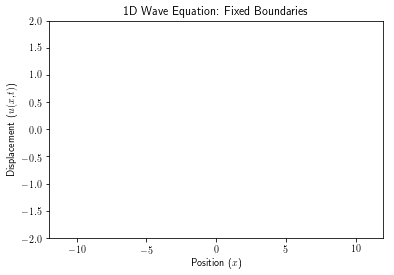

In [53]:
#Export to mpeg

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames= nt, interval=1, blit=True)

anim.save('1D_wave_Fixed_Boundaries.mp4', fps=30, extra_args=['-vcodec', 'libx264'])

(638,)

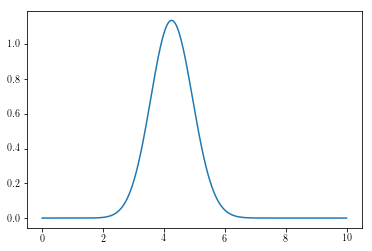